In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer.pitch as Pitch
import seaborn as sns

In [80]:
#Want to create a map of the events
df=pd.read_csv('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Liverpool vs Real Madrid UCL R016 2022:23/Liverpool vs Real Madrid 2022:23 UCL Round of 16.csv')

In [82]:
df

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Real Madrid,Modric,Pass,0,39,50,50,20,60
1,Liverpool,Henderson,Pass,0,43,35,62,13,55
2,Real Madrid,Camavinga,Pass,0,45,20,44,28,45
3,Real Madrid,Modric,Pass,0,53,29,77,36,87
4,Liverpool,Salah,Assist,0,58,22,21,11,43
5,Liverpool,Darwin,Goal,0,58,10,45,0,46
6,Liverpool,Salah,Shot,1,33,7,28,0,34
7,Liverpool,Salah,Goal,1,46,6,38,0,43
8,Real Madrid,Benzema,Assist,2,6,82,17,87,29
9,Real Madrid,Vini,Goal,2,6,88,34,100,58


In [84]:
#Want to know the number of events in the dataset
event_counts=df['Event'].value_counts()
print(event_counts)

Goal      7
Shot      7
Pass      5
Assist    4
Name: Event, dtype: int64


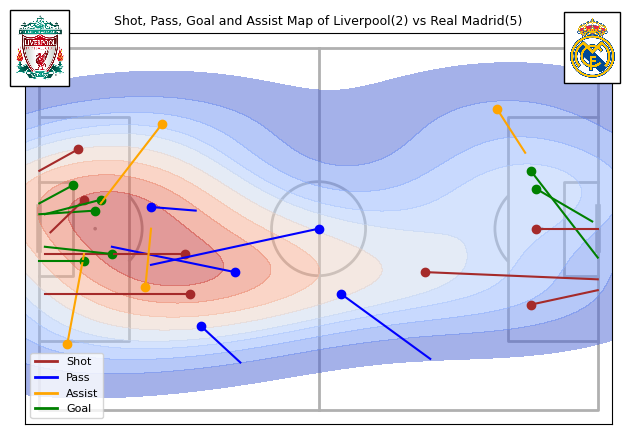

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

# Create the pitch
pitch = Pitch(pitch_type='wyscout', axis=True, label=True)
fig, ax = pitch.draw()

# Creating the heatmap using kdeplot
sns.kdeplot(
    x=df['X'],  # Use x= for X coordinates
    y=df['Y'],  # Use y= for Y coordinates
    fill=True,  # Fill the contours for better visualization
    cmap='coolwarm',  # Choose a colormap for the heatmap
    ax=ax,  # Use the same pitch axis
    alpha=0.5  # Transparency
)

#Loop through the dataset adn plot events with specfic colors
for X in range(len(df['X'])):
     if df['Event'][X] == 'Shot':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='brown')
        plt.scatter(df['X'][X], df['Y'][X], color='brown')
     if df['Event'][X] == 'Pass':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='blue')
        plt.scatter(df['X'][X], df['Y'][X], color='blue')
     if df['Event'][X] == 'Assist':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='orange')
        plt.scatter(df['X'][X], df['Y'][X], color='orange')
     if df['Event'][X] == 'Goal':
         plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='green')
         plt.scatter(df['X'][X], df['Y'][X], color='green')

#legend
legend_elements = [
    Line2D([0], [0], color='brown', lw=2, label='Shot'),
    Line2D([0], [0], color='blue', lw=2, label='Pass'),
    Line2D([0], [0], color='orange', lw=2, label='Assist'),
    Line2D([0], [0], color='green', lw=2, label='Goal'),
]

ax.legend(handles=legend_elements, loc='lower left', fontsize=8)

# Club image for Real Madrid
club_image = Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Real_Madrid_CF.svg.png')
imagebox = OffsetImage(club_image, zoom=0.10)
ab = AnnotationBbox(imagebox, (99, 0), frameon=True, xycoords='data')
ax.add_artist(ab)

# Club image for Liverpool
club_image = Image.open('/Users/siphuvuyomngxunyeni/Downloads/Liverpool_FC.svg.png')
imagebox = OffsetImage(club_image, zoom=0.19)
ab = AnnotationBbox(imagebox, (0,0), frameon=True, xycoords='data')
ax.add_artist(ab)

# Remove the x and y axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

# Add a title to the heatmap
plt.title('Shot, Pass, Goal and Assist Map of Liverpool(2) vs Real Madrid(5)', color='black', size=9)
plt.savefig('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Liverpool vs Real Madrid UCL R016 2022:23/Shot, Pass, Goal and Assist Map of Liverpool vs Real Madrid.png', dpi=300, bbox_inches='tight')

plt.show()